<a href="https://colab.research.google.com/github/SretenGlavinceski/MachineLearning/blob/main/ml_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линеарна регресија


### Вчитување на потребните библиотеки

In [103]:
import matplotlib.pyplot as plt #Библиотека за визуелизација
import seaborn as sns
import numpy as np #Библиотека за нумерички анализи
import pandas as pd
from scipy import stats #Библиотека за статистички анализи
from sklearn.model_selection import train_test_split
from sklearn import datasets #Библиотека за податочни множества за машинско учење
from sklearn.preprocessing import MinMaxScaler #Min max Scaler за нормализација на податоци во опсег [0,1]
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, BayesianRidge, ElasticNetCV #Вчитување на модели за линерна регресија
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #За евалуација на модели
from sklearn.feature_selection import SelectKBest, f_regression

### Вчитување на податоците

This dataset contains information on vehicle specifications, fuel consumption, and CO2 emissions, collected to analyze the environmental impact of vehicles and predict their CO2 emissions using regression models. The dataset is structured to support both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) approaches for machine learning projects.

In [48]:
import kagglehub
from sklearn.preprocessing import OrdinalEncoder

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/Student_Performance.csv")

# Initialize encoder
encoder = OrdinalEncoder()

# Fit and transform
df['Extracurricular Activities'] = encoder.fit_transform(df[['Extracurricular Activities']])

# Verify
print(df['Extracurricular Activities'].unique())  # Should show [0. 1.]
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("yasserh/song-popularity-dataset")
# print("Path to dataset files:", path)
# df = pd.read_csv(f"{path}/song_data.csv")
# df = df.drop('song_name', axis=1)

Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1
[1. 0.]


## Визуелизација на податоците

#### Првите 10 податоци од множеството

In [49]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1.0,9,1,91.0
1,4,82,0.0,4,2,65.0
2,8,51,1.0,7,2,45.0
3,5,52,1.0,5,2,36.0
4,7,75,0.0,8,5,66.0
5,3,78,0.0,9,6,61.0
6,7,73,1.0,5,6,63.0
7,8,45,1.0,4,6,42.0
8,5,77,0.0,8,2,61.0
9,4,89,0.0,4,0,69.0


### Статистика на податочно множество

In [51]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

number_of_features = X.shape[1]
number_of_targets = 1

feature_names = X.columns.tolist()
target_names = ['Performance Index']
N = X.shape[0]

print("Имиња на излезните класи: ", target_names)
print("Број на карактеристики (атрибути): ", number_of_features)
print("Број на излезни класи: ", len(target_names))
print("Број на инстанци: ", N)


Имиња на излезните класи:  ['Performance Index']
Број на карактеристики (атрибути):  5
Број на излезни класи:  1
Број на инстанци:  10000


### Проверка на missing-values

In [88]:
def calc_missing_values(df):
  counts = (df
            .isnull()
            .sum())
  percentage = (counts
                .divide(df.shape[0]) # df.shape[1] is number of columns this is rows
                .multiply(100)
                )
  missing = pd.concat([counts, percentage], axis = 1)
  missing.columns = ["Num.", "% of missing"]
  return missing
calc_missing_values(df)

,Num.,% of missing
Hours Studied,0,0.0
Previous Scores,0,0.0
Extracurricular Activities,0,0.0
Sleep Hours,0,0.0
Sample Question Papers Practiced,0,0.0
Performance Index,0,0.0


### Распределбата на вредностите за атрибутите со користење на хистограм

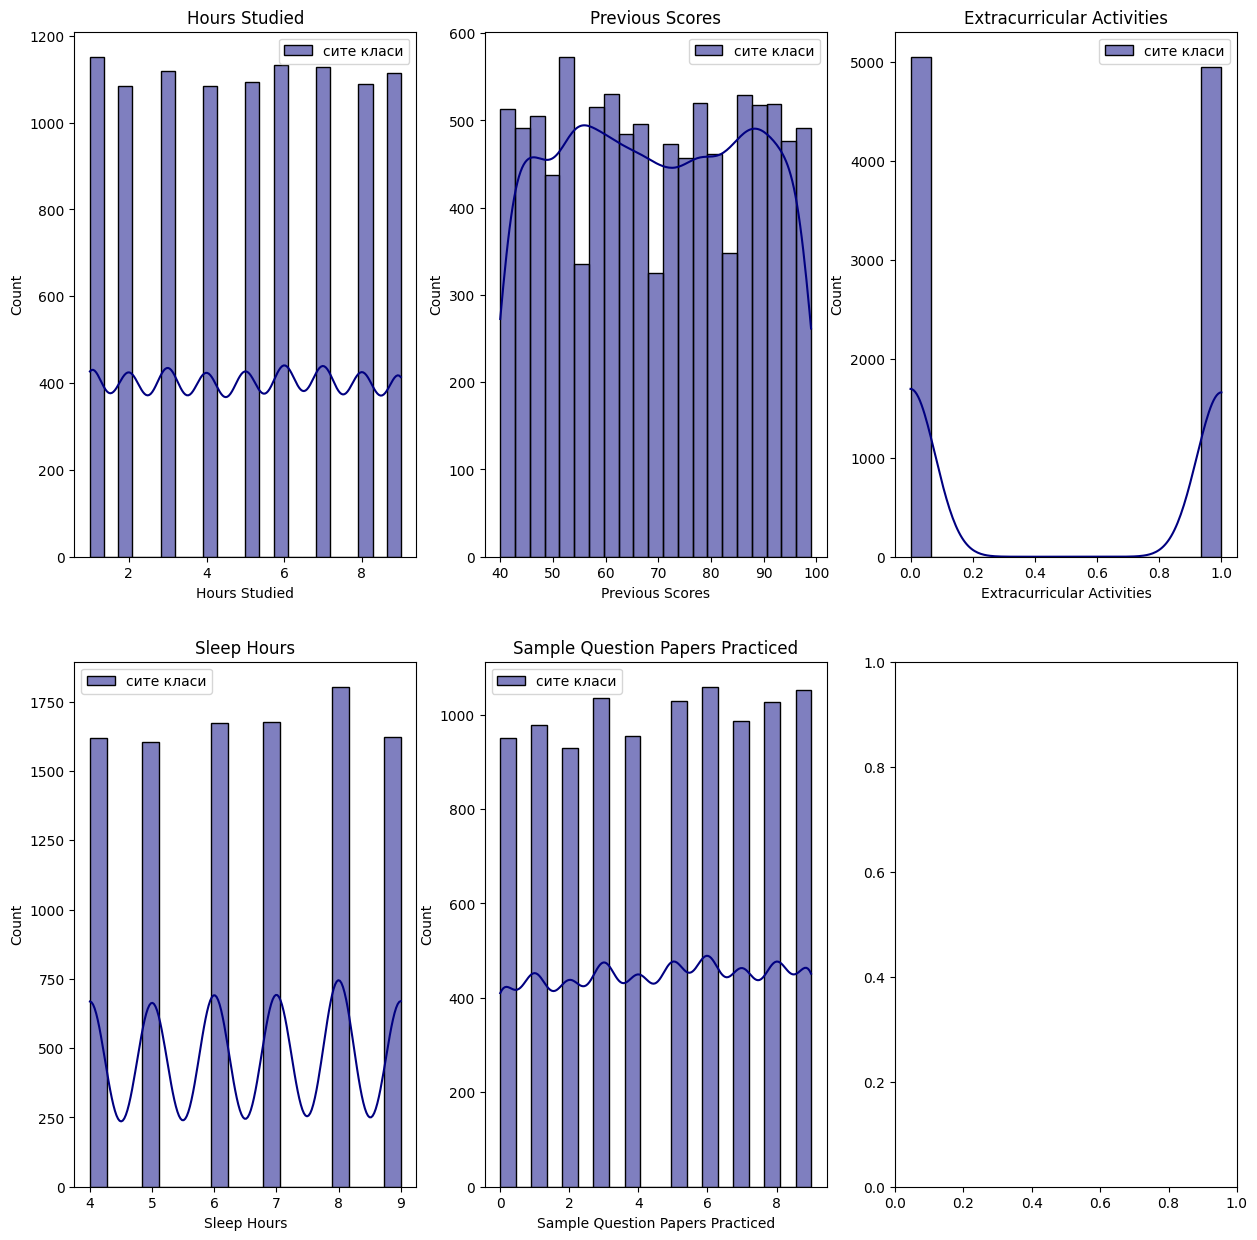

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
fig = plt.figure(figsize=(15, 15))
fig.subplots(nrows=2, ncols=3)

for i, col in enumerate(selected_columns):
    ax = plt.subplot(2, 3, i + 1)
    plt.title(col)

    sns.histplot(df[col], color='navy', label='сите класи', kde=True, stat="count")
    plt.legend()

plt.show()


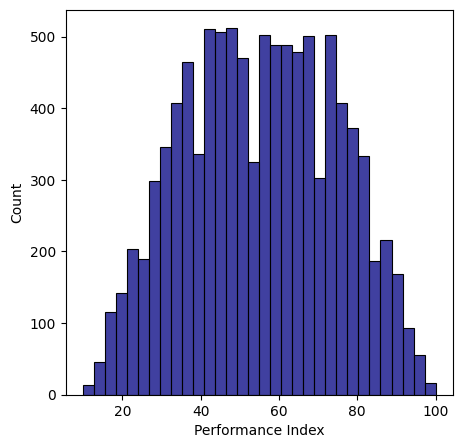

In [57]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(y, color = "navy")
plt.show()

### Визуелизација на зависности - секој атрибут со секој друг атрибут

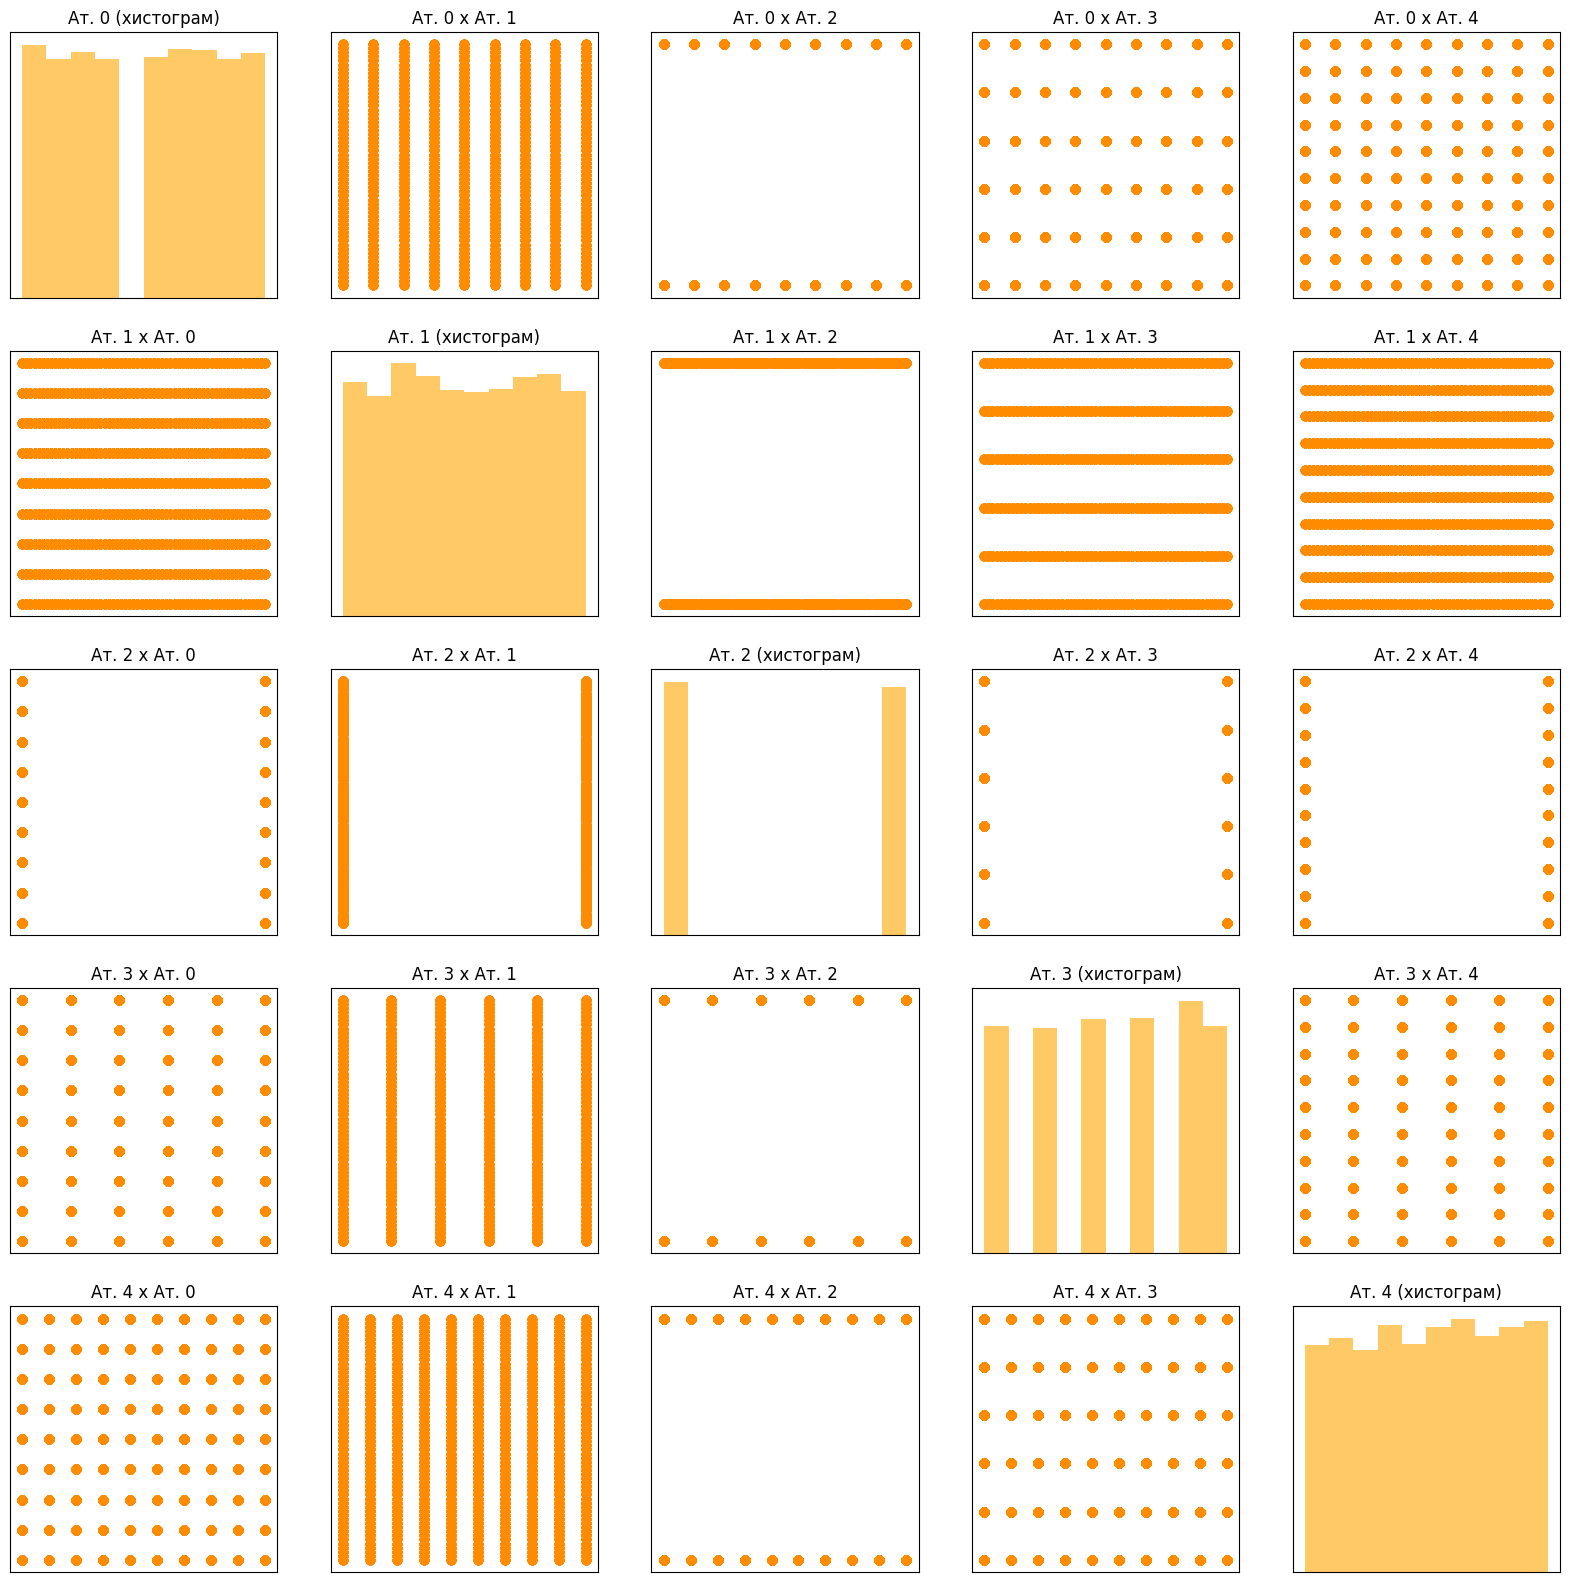

In [58]:
fig = plt.figure(figsize=(20, 20))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        ax = plt.subplot(number_of_features,number_of_features,number_of_features*feature_i + feature_j+1)
        if feature_i==feature_j:
          plt.hist(X.iloc[:, feature_i], alpha=.6, color="orange")
          plt.title("Ат. "+str(feature_i)+" (хистограм)")
        else:
          plt.scatter(X.iloc[:,feature_i], X.iloc[:,feature_j], color="darkorange")
          plt.title("Ат. "+str(feature_i)+" x Ат. "+str(feature_j)) # Атрибут i x Атрибут ј
          #plt.title(feature_names[feature_i] +" x "+feature_names[feature_j]) # Атрибут i x Атрибут ј
        plt.xticks(())
        plt.yticks(())
plt.show()

### Зависноста на секој атрибут и со излезната променлива преку дијаграми на растурање

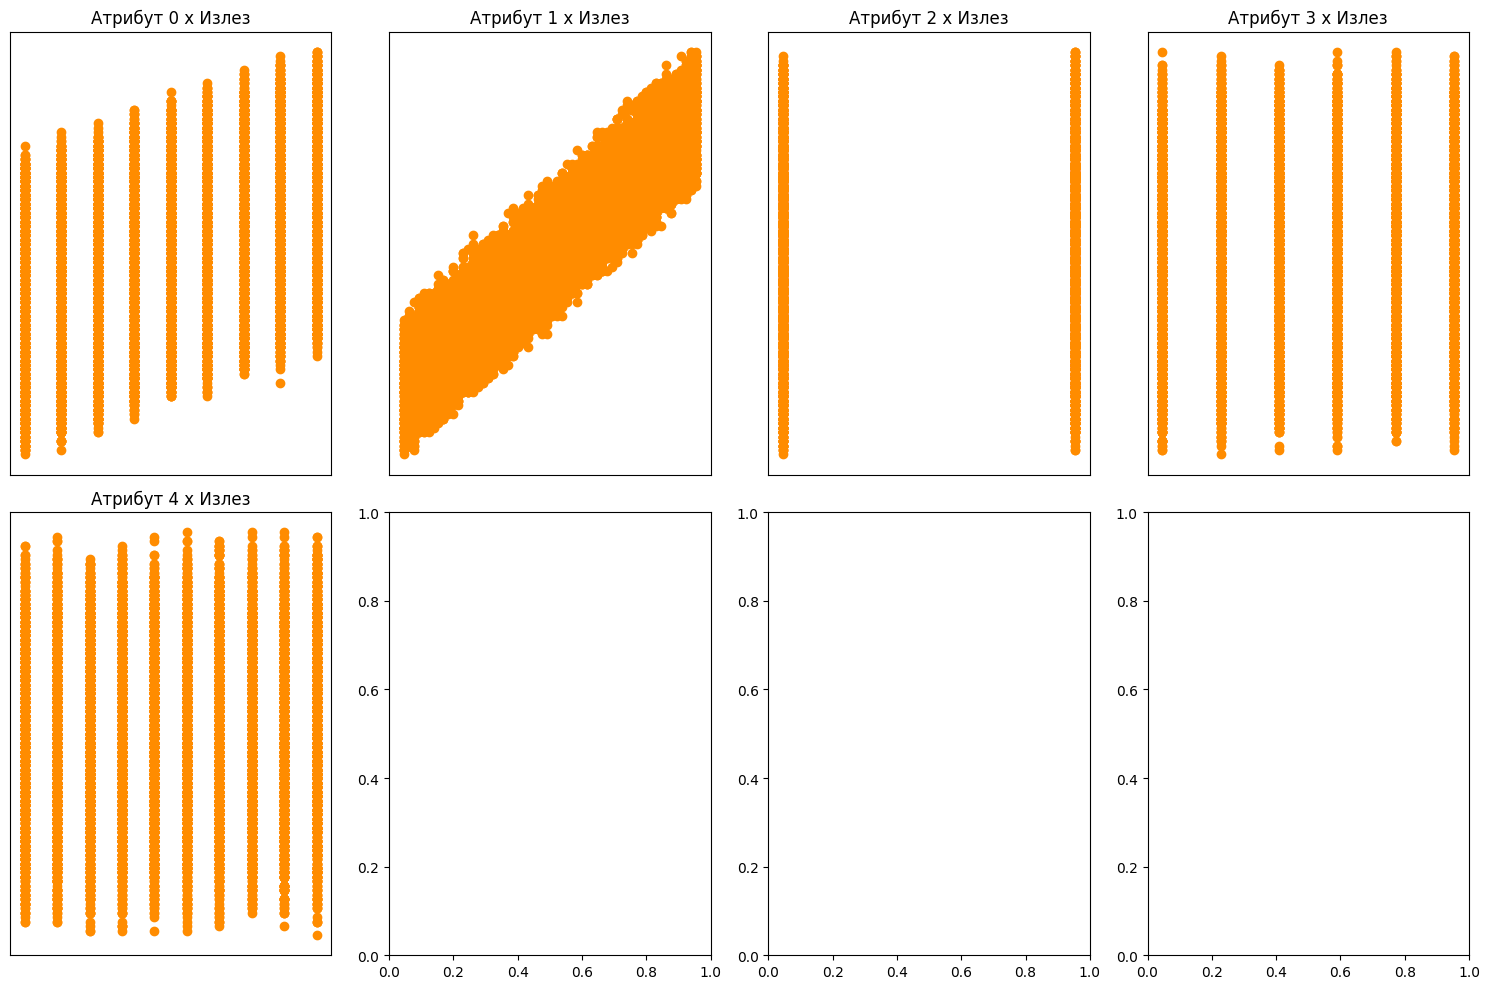

In [59]:
import matplotlib.pyplot as plt

num_rows = (number_of_features + 3) // 4
num_cols = min(4, number_of_features)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

for feat_i in range(number_of_features):
    row = feat_i // num_cols
    col = feat_i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]

    ax.scatter(X.iloc[:, feat_i], y, color="darkorange")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Атрибут {feat_i} x Излез")

plt.tight_layout()
plt.show()

### Изразување на зависностите квантитативно, со помош на Пирсоновиот коефициент на корелација

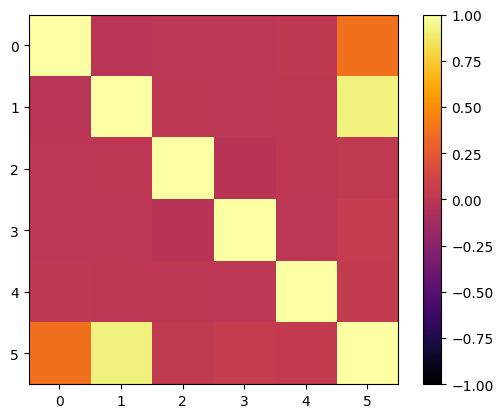

In [60]:
correlation_matrix = np.zeros((number_of_features+1,number_of_features+1))
# прво ги пресметуваме присоновите корелациски коефициенти за сите парови атибути
for feature_i in range(number_of_features):
    for feature_j in range(number_of_features):
        corr, _ = stats.pearsonr(X.iloc[:,feature_i], X.iloc[:,feature_j])
        correlation_matrix[feature_i][feature_j] = corr
# потоа ги пресметуваме пирсоновите корелациски коефициенти за секој атрибут со целната променлива
for feature_i in range(number_of_features):
    target_i = number_of_features
    corr, _ = stats.pearsonr(X.iloc[:,feature_i], y)
    correlation_matrix[feature_i][target_i] = corr
    correlation_matrix[target_i][feature_i] = corr
# на крај го пресметуваме пирсоновиот корелациски коефициент за целната променлива само со себе (ова може и да се изостави зашто резултатот е 1)
corr, _ = stats.pearsonr(y, y)
correlation_matrix[target_i][target_i] = corr
corr, _ = stats.pearsonr(X.iloc[:,feature_i], y)

plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno", vmin=-1, vmax=1) # ја исцртуваме матрицата со imshow
plt.colorbar()
plt.show()

### Контурниот график на густина (jointplot од библиотеката seaborn со опцијата kind="kde") ни дава претстава за распределбата на податоците и можни области на концентрација на зависностите.

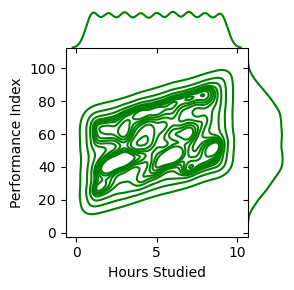

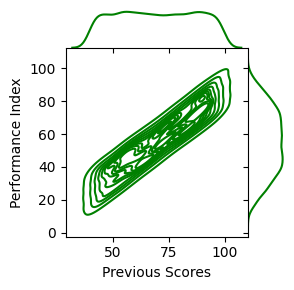

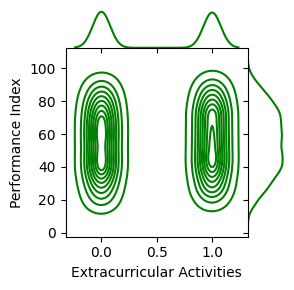

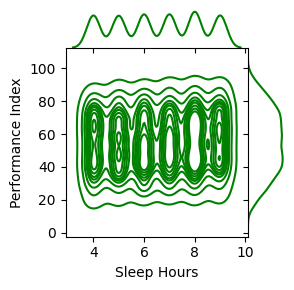

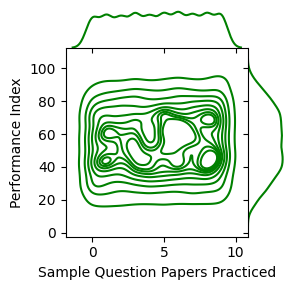

In [61]:
# sns.jointplot(x=X.iloc[:,0], y=y, kind="kde", space=0, color="g", height = 3)
# plt.show()
# откоментирајте го следниот код за приказ за секој атрибут
for feature_i in range(number_of_features):
   sns.jointplot(x=X.iloc[:,feature_i], y=y, kind="kde", space=0, color="g", height = 3)
plt.show()

## Нормализација на податоците и делење на тренинг и тест множества


In [91]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
mse = {}

## Линеарна регресија

Коефициенти W:  [22.81987144 60.00230374  0.60861668  2.38470742  1.72648297]
Пресек W0:  11.51783160853882
Средна квадратна грешка: 4.082628398521895
Средна апсолутна грешка: 1.6111213463123137
Корен на средна квадратна грешка: 2.020551508505016
R-квадрат:  0.9889832909573144


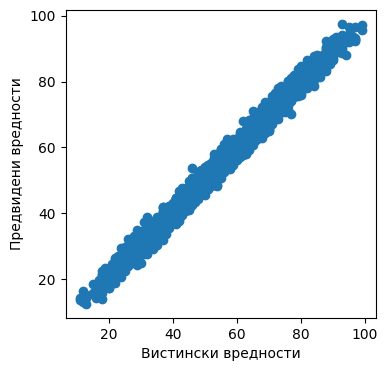

In [92]:
reg = LinearRegression().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test) # предвиди ги вредностите на тест податоците
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred)) # пресметај ја R - квадрат вредноста

mse['Linear Regression'] = mean_squared_error(y_test, y_pred)

# визуелизација на предвидените вредности од моделот
plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

## Ridge регресија

Коефициенти W:  [22.8170775  59.99359189  0.60860252  2.38446611  1.72639619]
Пресек W0:  11.523757408952768
Средна квадратна грешка: 4.083298387627951
Средна апсолутна грешка: 1.6112395070762409
Корен на средна квадратна грешка: 2.020717295325586
R-квадрат:  0.9889814830349852
Избран хипер-параметар alpha: 0.1


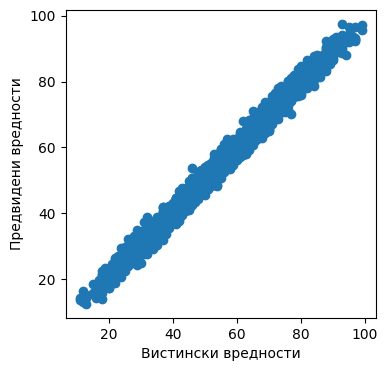

In [93]:
reg = RidgeCV(cv=5).fit(X_train, y_train) # 5-fold cross-validation
# reg = Ridge(alpha=1).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test) # предвиди ги вредностите на тест податоците
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred)) # пресметај ја R - квадрат вредноста

chosen_alpha = reg.alpha_

# Print the chosen alpha
print(f"Избран хипер-параметар alpha: {chosen_alpha}")

mse['Ridge Regression'] = mean_squared_error(y_test, y_pred)


# визуелизација на предвидените вредности од моделот
plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()


## Lasso регресија

Коефициенти W:  [22.77134823 59.94263076  0.58751415  2.33967282  1.67667546]
Пресек W0:  11.630737995392003
Средна квадратна грешка: 4.0905907474597845
Средна апсолутна грешка: 1.6122769639829115
Корен на средна квадратна грешка: 2.0225208892517736
R-квадрат:  0.9889618050729815
Избран хипер-параметар alpha: 0.005162635059322034


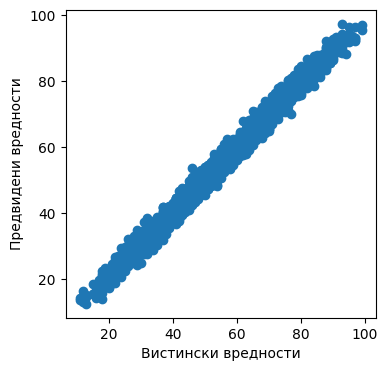

In [94]:
reg = LassoCV(cv=5).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test) # предвиди ги вредностите на тест податоците
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred)) # пресметај ја R - квадрат вредноста

chosen_alpha = reg.alpha_

# Print the chosen alpha
print(f"Избран хипер-параметар alpha: {chosen_alpha}")

mse['Lasso Regression'] = mean_squared_error(y_test, y_pred)

# визуелизација на предвидените вредности од моделот
plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

## Регресија на еластична мрежа


Коефициенти W:  [13.38125643 32.8976268   0.41936179  1.3559531   1.0838958 ]
Пресек W0:  30.730120178118664
Средна квадратна грешка: 78.28170055119135
Средна апсолутна грешка: 7.4363662289699475
Корен на средна квадратна грешка: 8.847694646131915
R-квадрат:  0.7887618871579523


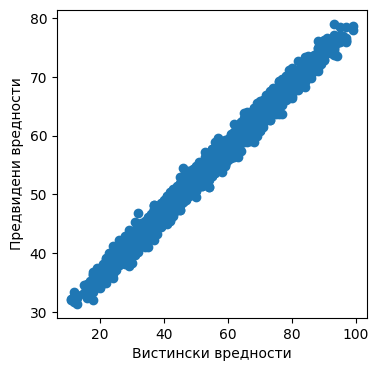

In [108]:
reg = ElasticNet(alpha = 0.1, l1_ratio = 0.3).fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred = reg.predict(X_test) # предвиди ги вредностите на тест податоците
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test,y_pred)) # пресметај ја R - квадрат вредноста

# визуелизација на предвидените вредности од моделот

mse['Elastic Net Regression'] = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

elasticCV = ElasticNetCV(l1_ratio=[.001, .01, 0.5, 1], cv=10).fit(X_train, y_train)
y_pred = elasticCV.predict(X_test)
mse['Elastic Net CV Regression'] = mean_squared_error(y_test, y_pred)



## Баесова риџ регресија

Коефициенти W:  [22.8197303  60.00186362  0.60861596  2.38469523  1.72647859]
Пресек W0:  11.518130973634776
Средна квадратна грешка: 4.082661895977473
Средна апсолутна грешка: 1.6111271323228207
[2.04405582 2.0441686  2.04471431 ... 2.0436377  2.04426617 2.04404826]
2000
Корен на средна квадратна грешка: 2.0205597976742666
R-квадрат:  0.9889832005665941


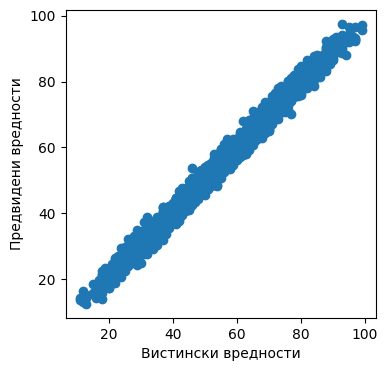

In [96]:
reg = BayesianRidge().fit(X_train, y_train)
print("Коефициенти W: ", reg.coef_)
print("Пресек W0: ", reg.intercept_)

y_pred, y_std = reg.predict(X_test, return_std = True) # предвиди ги вредностите на тест податоците
print("Средна квадратна грешка:", mean_squared_error(y_test, y_pred))
print("Средна апсолутна грешка:", mean_absolute_error(y_test, y_pred))
print(y_std)
print(len(y_std))
print("Корен на средна квадратна грешка:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-квадрат: ", r2_score(y_test, y_pred)) # пресметај ја R - квадрат вредноста

mse['Bayes Ridge Regression'] = mean_squared_error(y_test, y_pred)

# визуелизација на предвидените вредности од моделот
plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred)
plt.xlabel("Вистински вредности")
plt.ylabel("Предвидени вредности")
plt.show()

### Споредба на MSE (Средна квадратна грешка) на секој од моделите

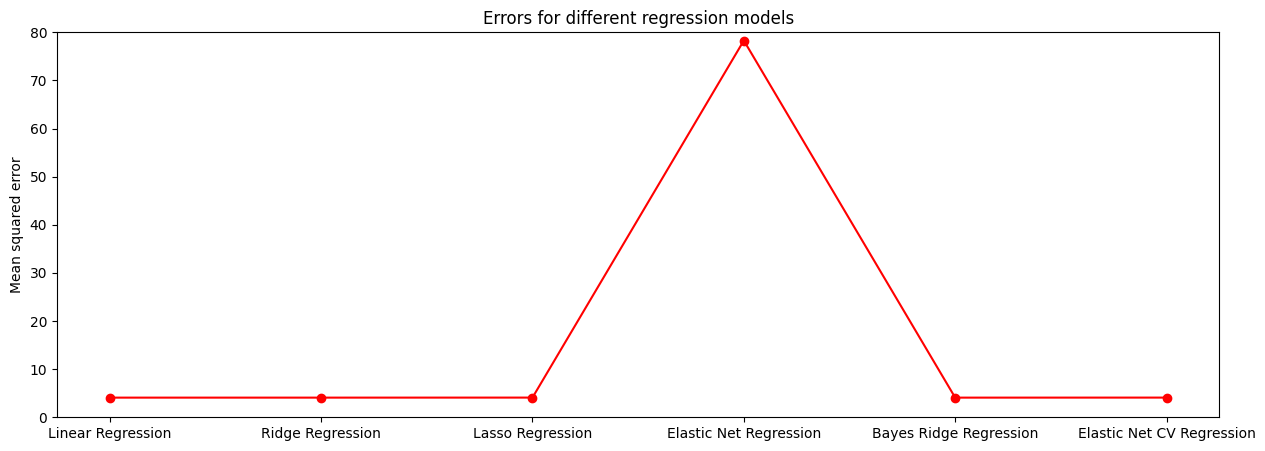

In [110]:
plt.figure(figsize=(15, 5))
plt.plot(mse.keys(), mse.values(), color = 'red', marker = 'o')
plt.ylim(0, 80)
plt.title("Errors for different regression models")
plt.ylabel("Mean squared error")
plt.show()

## Споредба на моделите со приказ на линијата која најдобро одговара на податоците

In [85]:
Xi=X[:,1].reshape(-1,1)
print("Xi=", Xi)
print("y=",y)

# поставете модел на линеарна регресија
lr = LinearRegression() # иницијализација на моделот
lr.fit(Xi, y) # поставете го моделот на податоците
lrsigma = np.sum((y - lr.predict(Xi))**2) /(N-2) # пресметка на варијансата на моделот

# поставете модел на риџ регресија
ridge = RidgeCV()
ridge.fit(Xi, y)
ridgesigma = np.sum((y - ridge.predict(Xi))**2) /(N-2)

# поставете модел на ласо регресија
lasso = LassoCV()
lasso.fit(Xi, y)
lassosigma = np.sum((y - lasso.predict(Xi))**2) /(N-2)

# поставете модел на еластична мрежа
elastic = ElasticNet(alpha=0.1, l1_ratio = 0.4)
elastic.fit(Xi, y)
elasticsigma = np.sum((y - elastic.predict(Xi))**2) /(N-2)

# поставете модел на баесова риџ регресија
Bayes = BayesianRidge()
Bayes.fit(Xi, y)

print("Коефициенти на моделите")
print("Линеарна регресија: ",lr.coef_)
print("Риџ регресија: ", ridge.coef_)
print("Ласо регресија: ", lasso.coef_)
print("Регресија на еластична мрежа:", elastic.coef_)
print("Баесова риџ регресија: ", Bayes.coef_)

Xi= [[1.        ]
 [0.71186441]
 [0.18644068]
 ...
 [0.72881356]
 [0.96610169]
 [0.57627119]]
y= 0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64
Коефициенти на моделите
Линеарна регресија:  [59.81636539]
Риџ регресија:  [59.80944292]
Ласо регресија:  [59.75654903]
Регресија на еластична мрежа: [35.0280649]
Баесова риџ регресија:  [59.81520527]


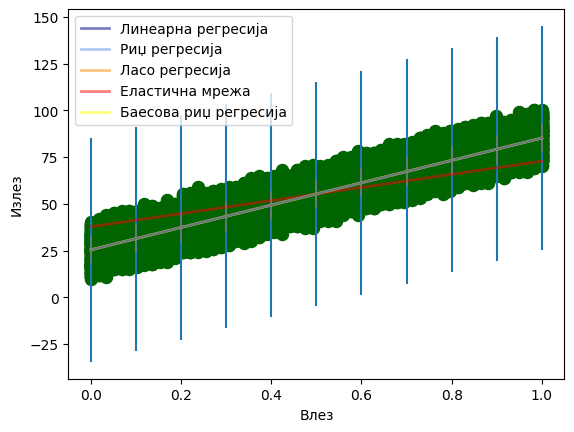

In [86]:
# пресметка на линијата на секој модел во опсег [0, X.max()]
line_X = np.arange(0, 1.1, 0.1)[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ridge = ridge.predict(line_X)
line_y_lasso = lasso.predict(line_X)
line_y_elastic = elastic.predict(line_X)
line_y_bayes, Bayessigma = Bayes.predict(line_X, return_std = True) # во баесовиот модел може да се пресмета варијансата за секоја предикција

lw = 2 # параметар за визуелизација (linewidth)
plt.figure() # ги цртаме податочните точки и ги цртаме линиите што ги претставуваат различните модели, ги цртаме и лентите за грешки на моделите за линеарна и баесова риџ регресија
plt.scatter(Xi, y, color='darkgreen', marker='.', s = 300)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Линеарна регресија', alpha=0.5)
plt.errorbar(line_X, line_y,yerr=lrsigma)
plt.plot(line_X, line_y_ridge, color='cornflowerblue', linewidth=lw, label='Риџ регресија', alpha=0.5)
plt.plot(line_X, line_y_lasso, color='darkorange', linewidth=lw, label='Ласо регресија', alpha=0.5)
plt.plot(line_X, line_y_elastic, color="red", linewidth=lw, label='Eластичнa мрежa', alpha=0.5)
plt.plot(line_X, line_y_bayes, color="yellow", linewidth=lw, label='Баесова риџ регресија', alpha=0.5)
plt.errorbar(line_X, line_y_bayes, yerr=Bayessigma, alpha = 0.3)

plt.legend(loc='best')
plt.xlabel("Влез")
plt.ylabel("Излез")
plt.show()